In [3]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 깔끔한 그래프 출력을 위해
import matplotlib as mpl
mpl.rc('axes',labelsize = 14)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize = 12)

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

## 4.1.1 정규방정식

In [4]:
X = 2 *np.random.rand(100,1)
y  = 4 + 3*X + np.random.rand(100,1)

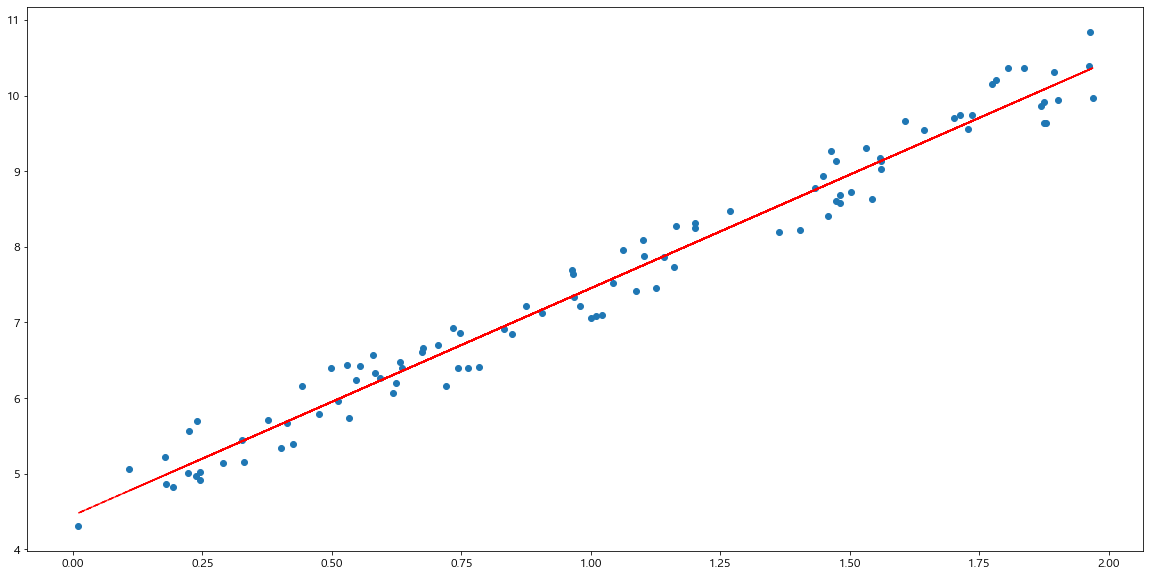

In [59]:
plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.plot(X_test,f1(X_test),'r--')
plt.show()

위 그래프에 추세선 표시해보자

In [20]:
X_test = X.reshape(1,-1)[0]

In [52]:
y_test = y.reshape(1,-1)[0]
y_test

array([ 9.91246473,  4.30729266,  6.15712599,  4.8196841 ,  8.19436037,
        5.74092372,  9.64071352,  8.58225246,  7.08996364,  6.44145768,
        8.93672341,  9.63898245,  9.54683283,  6.23239348,  6.41888283,
        9.55283777,  5.15804762,  7.21466988,  7.85958512,  6.69719644,
        6.39225314,  6.16208037,  6.93052807,  6.39976423,  8.72690784,
        7.46033758,  9.17822261,  5.06430464,  8.61118977, 10.383689  ,
        7.87266561,  6.66762003,  8.21893856, 10.84094098,  9.702986  ,
        6.47052553,  7.12120588,  7.09672361,  9.86128627,  9.66962032,
        4.92183342,  9.26839398,  6.41328857,  7.41490004,  8.27392547,
        8.47723323,  7.21298928,  7.73645792,  6.268156  ,  6.60594062,
        7.68712281,  7.63397995,  9.97054982,  7.33210476,  9.13513239,
       10.36107448,  8.32032775,  8.08444241, 10.15201426,  9.74769701,
        6.8544543 ,  6.33035556,  5.71229447,  8.25494377,  5.33737289,
        7.52368889,  6.39412541,  5.95524352,  8.63026371,  6.84

In [53]:
fp1 = np.polyfit(X_test,y_test,1)
fp1 # 결과값 : 1차항의 계수,상수항 .. 이렇게 나오는 듯.

array([3.00354766, 4.44791286])

In [54]:
f1 = np.poly1d(fp1)
f1

poly1d([3.00354766, 4.44791286])

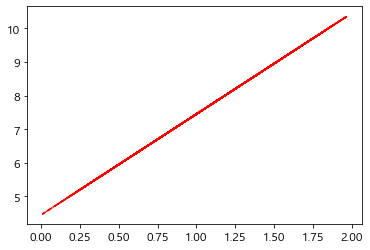

In [60]:
plt.plot(X_test,f1(X_test),'r--')

정규방정식 계산

In [63]:
X_b = np.c_[np.ones((100,1)),X] # 모든 샘플에 X0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [64]:
theta_best # 와 나 가우시안 잡음 진짜 괜찮나부다...

array([[4.44791286],
       [3.00354766]])

세타 햇을 사용해 예측해보자

In [65]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] # 모든 샘플에 X0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.44791286],
       [10.45500818]])

모델의 예측을 그래프에 나타내보겠습니다.

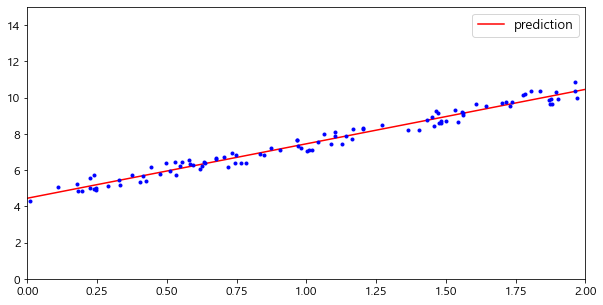

In [77]:
plt.figure(figsize = (10,5))
plt.plot(X_new,y_predict,'r-',label = 'prediction')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.legend(loc = 'best',fontsize= 13)
plt.show()

사이킷런 선형회귀 수행

In [78]:
from sklearn.linear_model import LinearRegression

In [80]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
lin_reg.intercept_, lin_reg.coef_

(array([4.44791286]), array([[3.00354766]]))

In [82]:
lin_reg.predict(X_new)

array([[ 4.44791286],
       [10.45500818]])

LinearRegression클래스는 scipy.linalg.lstsq()함수를 기반으로 합니다.

<h4>np.linalg.lstsq()함수 반환값.</h4>

<b>Returns</b>
```
x{(N,), (N, K)} ndarray
Least-squares solution. If b is two-dimensional, the solutions are in the K columns of x.

residuals{(1,), (K,), (0,)} ndarray
Sums of residuals; squared Euclidean 2-norm for each column in b - a*x. If the rank of a is < N or M <= N, this is an empty array. If b is 1-dimensional, this is a (1,) shape array. Otherwise the shape is (K,).

rankint
Rank of matrix a.

s(min(M, N),) ndarray
Singular values of a.
```

In [83]:
theta_best_svd,residuals, rank, s= np.linalg.lstsq(X_b,y,rcond = 1e-6)

In [85]:
rank

2

In [86]:
s

array([14.85135913,  3.73525214])

In [87]:
residuals

array([7.63419019])

In [84]:
theta_best_svd

array([[4.44791286],
       [3.00354766]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 유사역행렬 (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [88]:
np.linalg.pinv(X_b).dot(y)

array([[4.44791286],
       [3.00354766]])

## 배치 경사 하강법을 사용한 선형 회귀


식 4-6: 비용 함수의 그레이디언트 벡터

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

식 4-7: 경사 하강법의 스텝

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

In [96]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta*gradients

In [97]:
theta

array([[4.44791286],
       [3.00354766]])

학습률을 바꿔보면 어떨까?

In [134]:
A = 10
for i in range(10):
    print(A)
    A-=i
    print(A)

10
10
10
9
9
7
7
4
4
0
0
-5
-5
-11
-11
-18
-18
-26
-26
-35


In [135]:
A = 10
for i in range(10):
    print(A)
    A = A - i
    print(A)

10
10
10
9
9
7
7
4
4
0
0
-5
-5
-11
-11
-18
-18
-26
-26
-35


In [139]:
theta_path_bgd = []

def plot_gradient_descent(theta,eta,theta_path = None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration<10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration >0 else "r--"
            plt.plot(X_new,y_predict,style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta-  eta*gradients 
        # 이거 theta -= 으로 표현하면 하나만 계속 남는다.. theata에 무조한 하나가 표현된다.
        # 좌측 theta ; New_theta인 것. 우측 theta : Input_theta인것.
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [113]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

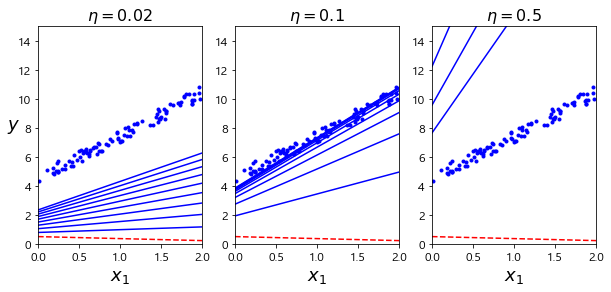

In [140]:
np.random.seed(42)
theta = np.random.randn(2,1) # 무작위 초기화

plt.figure(figsize = (10,4))
plt.subplot(131) ; plot_gradient_descent(theta,eta = 0.02)
plt.ylabel('$y$', rotation = 0,fontsize = 18)
plt.subplot(132) ; plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133) ; plot_gradient_descent(theta,eta = 0.5)
plt.show()